# Graph Theory Questions for Jupyter-based Exam

## Instructions
1. You may use any source of information you can find, so long as you don't communicate with anyone else.
2. You can put your answers in the marked cells. If you prefer making multiple answer cells that's also ok, but make sure I know which question you're answering where.
3. You can split up code answers into multiple cells if you like, but keep them in order for me to grade!
3. You get partial points for partial answers. This means you can still get points for coding questions if you explain your reasoning, but don't manage the code itself.
4. You have 120 minutes total for the exam (unless you are eligible for "Special Facilities"), distribute it wisely amongst questions.
5. Remember you can look up the documentation of any function or object by appending "?" (question mark) to it without calling it with "()"; this is the same documentation as you'd look up on the internet! See an example in the next cell.
4. Unless specified otherwise you may assume graphs are simple and undirected.
6. Your final grade will be `score / 70 * 9 + 1`


# -- BEGIN EXAM --
Good luck!
*Don't forget to run the global imports defined in the next cell!!!*

In [1]:
# Global definitions you will need are here; RUN THIS CELL
# Define any extra global modules you want to add yourself here as well!
# As well as any extra helper functions you want to use in all exercises below.
import networkx as nx
import pickle
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Example for how to get documentation from within the notebook
nx.Graph?

## Question 1 (10pt)

Answer the following questions.

1. What is the definition of an Eulerian cycle?
1. What is the definition of a Hamiltonian cycle?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Eulerian cycle of this graph (assuming it exists)?
1. Given a graph consisting of $n$ nodes and $k$ edges, what is the size of the Hamiltonian cycle of this graph (assuming it exists)?
1. What criteria must a graph meet for an Eulerian cycle to exist? And an Eulerian tour?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $$x = \max\limits_{u \in V} \max\limits_{v \in V} d(u, v) $$ The quantity $x$ has a name; what is its name?
1. Explain in your own words what the following means, given that the function $d(a, b)$ signifies the length of the  shortest path between nodes $a$ and $b$: $$y = \min\limits_{u \in V} \max\limits_{v \in V} d(u, v) $$ The quantity $y$ has a name; what is its name?

In [4]:
## Answers to question 1
#_> # A Eulerian cycle in a graph is a cycle that visits every edges exactly once and returns to the starting vertex. 
# If in a undirected graph all the nodes of a graph have a  even degree, then 
# it is possible to have eulerian cycle in the graph. For the directed graph, in-degree and out degree of every node has to be same.

#2
#_> # A hamiltonian cycle in a graph is a cycle that visits every vertex exactly once and returns to the starting vertex. There are no simple formula for detecting the Hamiltonian cycle
#3
# -> The size of the Eulerian cycle of this graph as assuming it exists is k
# -> The size of the Hamiltonian cycle of this graph as assuming it exists is n
# For existing a Eulerian cycle in a graph, the cirteria is:
# An undirected graph, has an eulerian cycle if and only if every vertex has even degree and all of it's vertices with nonzero degree belong to a single connected component.
# An directed graph, has an eulerian cycle if and only if every vertex has equal in_degee and out degree and all of it's vertices with nonzero degree belong to a single strongly connected graph.
# same goes for the eulerian tour also. 
# An directed graph has a eulerian trail or path if and only if at most one vertex has (out degree)-(in degree) = 1, at most one vertex (in degree) - (out degree)= 1 , every other vertex has equal in degree and out degree 
# and all of it's vertices with non zero degree belong to a single connected component



# It means that for a fixed node u, maxd(u,v) finds the maximum shortest path distance from u to any other node node v in the graph.  This gives the longest shortest path from u to any other node. 
# Then the outer max finds the maximum of these values values across all nodes u in the graph. In other words, It finds the longest shortest path distance among all the nodes in the graph.
# This is called the diameter
# It means that, for a fixed node u, max d(u,v) find the maximum sortest  path distance from u to any other node in the graph. In other words, we can say that, from node u to any other node, we find the longest shortest path.
# The outer min finds the minimum of these values across all nodes u in graph. in other words it finds the longest shortest path to any other node v is minimized .This is called radius..
# The outer min in then determines the smallest of these maximum distances across all nodes u in the graph. In other words, it identifies the node for which the longest shortest path to any other node 
# v is minimized. This value is known as the radius of the graph


## Question 2 (20pt)

1. Take a look at the file "foodwebs.txt". It models the predatory relationships in a marine ecosystem ("who eats whom"). Each line in the file contains at least 2 values, separated by commas. The first value is a "Species", and all other values on the line are "Species they feed on". The latter lists for every species the other species in the table that they eat. (Except for the so-called "primary producers" like the seaweed Kelp which "eat" inorganic resources like sunlight. These have a prey list denoted "-"). For example, "Shark" eats "Sea otter"; and "Sea stars" eats "Abalone", "small herbivorous fishes", and "sea urchins". This web can be modeled as a digraph; the species are in vertices and arcs represent an "eaten by" relationship between two species (from prey to predator). Construct such a digraph by parsing the "foodwebs.txt" comma-separated-file and using the appropriate NetworkX objects. Plot this digraph as well and check that it is weakly connected.
  
  If you don't manage, use the following code snippet to continue. You will then get 0 points on this subquestion, however.
  ```py
  with open('foodweb.pickle', 'rb') as jar:
       digraph = pickle.load(jar)
  ```

2. Ecologists like to understand an ecosystem in terms of trophic levels, that is groups of predators which eat prey of comparable size/type (sometimes also called an ecological "niche"). Let's try to infer these trophic levels automatically from our dataset, using network methods. We can imagine two different methods:

  - The first possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the shortest path from a level 0 species to X is of length k.
  - The second possible definition of a trophic level of species X is: i. 0 if X is a primary producer in the food web (a species that does not consume any species in the food web). ii. k if the longest path from a level 0 species to X is of length k.
  
  Implement both these possible definitions as the functions "trophic_short" and "trophic_long" respectively and calculate the trophic level for all species in the foodweb with both functions.

3. Which of the two methods results in trophic levels which best matches the idea of a "trophic level" discussed above, of predators which feast on similar type/size of prey? Provide arguments for your answer!

16
True


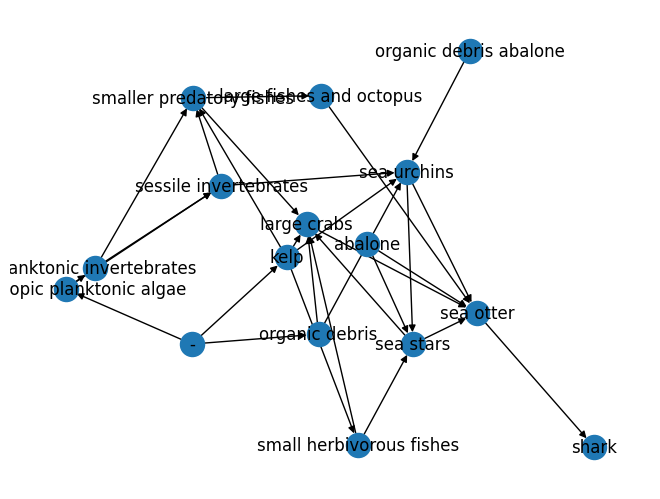

In [36]:
graph = nx.DiGraph()
with open('foodwebs.txt') as infile:
    for line in infile:
        species = line.split(',')
        predator = species[0]
        prey = species[1:]
        predator = predator.strip().casefold()
        for single_prey in prey:
            single_prey = single_prey.strip().casefold()
            graph.add_edge(single_prey, predator)
print(len(graph.nodes))
nx.draw(graph, with_labels=True)
print(nx.is_weakly_connected(graph))

['shark', 'sea otter', 'sea stars', 'sea urchins', 'large crabs', 'large fishes and octopus', 'abalone', 'small herbivorous fishes', 'kelp', 'sessile invertebrates', 'organic debris abalone', 'organic debris', 'smaller predatory fishes', 'planktonic invertebrates', '-', 'microscopic planktonic algae']
16


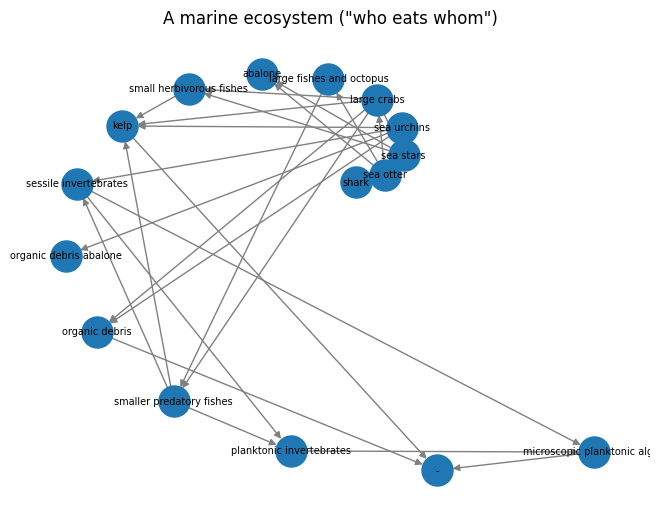

True

In [8]:
## Answers to Question 2
import pandas as pd
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt

with open ('foodwebs.txt') as file:
    data = file.readlines()
# df = defaultdict(list)
df = []
G = nx.DiGraph()
for line in data:
    line= line.strip()
    species = line.split(',')
    predator = species[0].strip().casefold()
    prey = species[1:]
    for single_prey in prey:
        single_prey = single_prey.strip().casefold()
        G.add_edge(predator,single_prey)
   # df.append((predator,prey))
    # prey = [ p. for p in line[1:] if p.strip() != ' -']
    # if len(prey)!=0:
    #     if ' and ' in predator:
    #         preda = predator.split(' and ').
    #         df.append((preda[0].casefold(),prey))
    #         df.append((preda[1],prey))
    #     else: 
    #      df.append((predator,prey))
# print(df)

# l= []
# for predator,prey_list in df:
#     for prey in prey_list:
#         G.add_edge(predator,prey)
# print(l)
print(G.nodes)
print(len(G.nodes))
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels= True, node_size = 500, font_size = 7, edge_color = 'gray', arrows= True)
plt.title('A marine ecosystem ("who eats whom")')
plt.show()

#weekly connected graph
nx.is_weakly_connected(G)

# The graph is  weekly connected graph


In [40]:
# primary_producer = ['microscopic planktonic algae', 'organic debris', 'kelp']
# import numpy as np
# def trophic_short(graph):
#     distance = {node: np.inf for node in graph.nodes}
#     for node in graph.nodes:
#         path_list = nx.shortest_path_length(graph, node)
#         print(path_list)
#         for path,dis in path_list.items():
#             print(path)
#             if path in primary_producer:
#                 if (dis -1)  < distance[node] :
#                    distance[node] = dis
#     return distance

#         # for species, length in paths.items():
#         #     if species not in distance:
#         #         distance[species] = length - 1
# print(f'Trophic_short\n: {trophic_short(G)}')
        
# def trophic_short(graph):
#     distances = {}
#     for node in graph:
#         path_length = nx.shortest_path_length(graph, '-', node) - 1
#         distances[node] = path_length
#     return distances

# print(trophic_short(graph))
    
# def trophic_short(graph):
#     distances = {}
#     for node in graph:
#         path_length = nx.shortest_path_length(graph, '-', node) - 1
#         distances[node] = path_length
#     return distances

# print(trophic_short(graph))

def trophic_long(graph):
    distances = {}
    for node in graph:
        if node == '-':
            distances[node] = 0
            continue
        all_paths = list(nx.all_simple_paths(graph, '-', node))
        lengths = [len(p) for p in all_paths]
        distances[node] = max(lengths) - 1
    return distances
print(trophic_long(graph))
    
# def trophic_long(graph):

ValueError: max() iterable argument is empty

## Question 3 (20 pt)

The Davis southern women graph is constructed from data collected by Davis et al. in the 1930s. They tracked the attendence of a number of women to several social clubs.

1. Load the graph in the file "dwcg.gml". This file is in GML format. If you don't manage, use the following snippet to get 0 point at this subquestion: `graph = nx.davis_southern_women_graph()`.
1. What class/type of graph is this? Be as specific as possible
1. How many social clubs are there? How many women?
1. Plot a histogram of the sizes of the clubs, and a histogram of the number of clubs women are part of.
1. Which clubs have the most members in common?

[('Evelyn Jefferson', {'bipartite': 0}), ('Laura Mandeville', {'bipartite': 0}), ('Theresa Anderson', {'bipartite': 0}), ('Brenda Rogers', {'bipartite': 0}), ('Charlotte McDowd', {'bipartite': 0}), ('Frances Anderson', {'bipartite': 0}), ('Eleanor Nye', {'bipartite': 0}), ('Pearl Oglethorpe', {'bipartite': 0}), ('Ruth DeSand', {'bipartite': 0}), ('Verne Sanderson', {'bipartite': 0}), ('Myra Liddel', {'bipartite': 0}), ('Katherina Rogers', {'bipartite': 0}), ('Sylvia Avondale', {'bipartite': 0}), ('Nora Fayette', {'bipartite': 0}), ('Helen Lloyd', {'bipartite': 0}), ('Dorothy Murchison', {'bipartite': 0}), ('Olivia Carleton', {'bipartite': 0}), ('Flora Price', {'bipartite': 0}), ('E1', {'bipartite': 1}), ('E2', {'bipartite': 1}), ('E3', {'bipartite': 1}), ('E4', {'bipartite': 1}), ('E5', {'bipartite': 1}), ('E6', {'bipartite': 1}), ('E7', {'bipartite': 1}), ('E8', {'bipartite': 1}), ('E9', {'bipartite': 1}), ('E10', {'bipartite': 1}), ('E11', {'bipartite': 1}), ('E12', {'bipartite': 1})

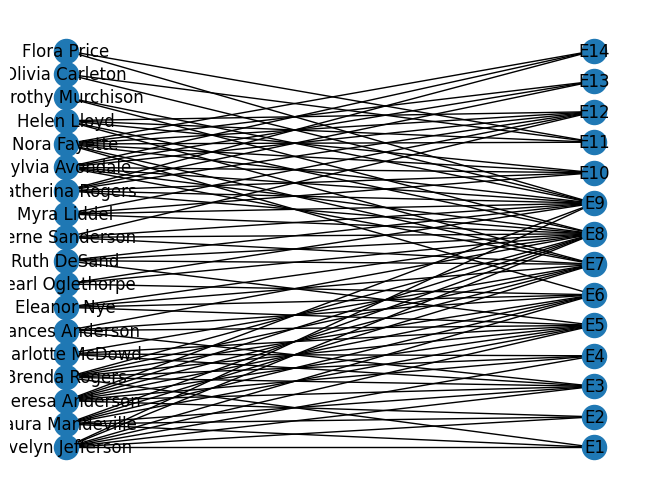

In [64]:
## Answers to Question 3
dgml = nx.read_gml('dswc.gml')
print(dgml.nodes(data=True))
print(nx.is_bipartite(dgml))
womens,clubs = nx.bipartite.sets(dgml)
len(womens), len(clubs)

womens_nodes = [node for node in dgml.nodes if dgml.nodes[node]['bipartite'] == 0]
womens_nodes
pos = nx.bipartite_layout(dgml,womens_nodes)
nx.draw(dgml, pos, with_labels = True)


{'E12': 6, 'E5': 8, 'E1': 3, 'E9': 12, 'E3': 6, 'E13': 3, 'E14': 3, 'E7': 10, 'E6': 8, 'E2': 3, 'E11': 4, 'E10': 5, 'E8': 14, 'E4': 4}


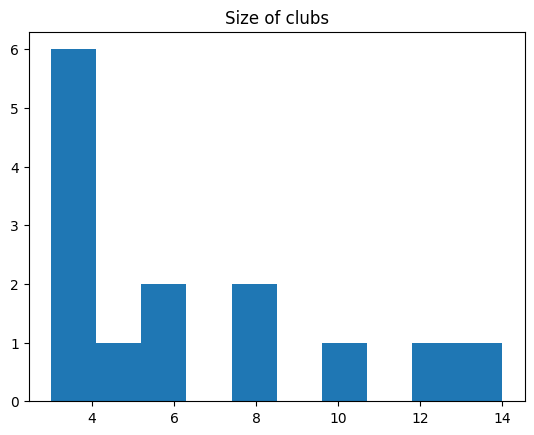

{'Evelyn Jefferson': 8, 'Laura Mandeville': 7, 'Theresa Anderson': 8, 'Brenda Rogers': 7, 'Charlotte McDowd': 4, 'Frances Anderson': 4, 'Eleanor Nye': 4, 'Pearl Oglethorpe': 3, 'Ruth DeSand': 4, 'Verne Sanderson': 4, 'Myra Liddel': 4, 'Katherina Rogers': 6, 'Sylvia Avondale': 7, 'Nora Fayette': 8, 'Helen Lloyd': 5, 'Dorothy Murchison': 2, 'Olivia Carleton': 2, 'Flora Price': 2}


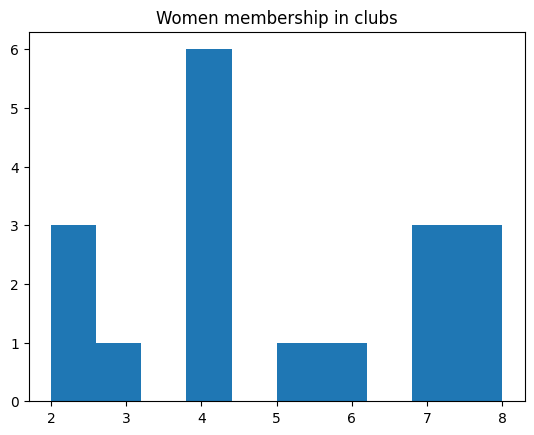

In [78]:
clubs_size = {}

for club in list(clubs):
    clubs_size[club] = dgml.degree(club)
print(clubs_size)

plt.hist(clubs_size.values())
plt.title('Size of clubs')
plt.show()

women_clubs = {}
for women in womens_nodes:
    women_clubs[women] = dgml.degree(women)
print(women_clubs)

plt.hist(women_clubs.values())
plt.title('Women membership in clubs')
plt.show()



In [88]:
# club_member = defaultdict(list)
# for club in list(clubs):
#     for women in womens_nodes:
#         if dgml.has_edge(club, women):
#             club_member[club].append(women)

common_member = []
for i, club1 in enumerate(list(clubs)):
    for club2 in list(clubs)[i+1:]:
        # intersect = set(club_member[club1]).intersection(set(club_member[club2]))
        intersect = set(dgml[club1]).intersection(set(dgml[club2]))

        common_member.append((club1,club2,len(intersect)))


max(common_member)


('E9', 'E8', 9)

## Question 4 (20 pt)

Caveman graphs are defined as a graph consisting of $l$ disconnected cliques of size $k$. Networkx has a convenient function for generating these: `nx.caveman_graph`. In this caveman graph there are clear communities: the original cliques used to construct this graph. Finding communities in general is pretty hard, but in this specific case they are so obvious existing algorithms will (should) manage without issue. 

In this question you will investigate the quality of a few different embeddings algorithms using a caveman graph.

1. Write a function that does the following:

  a. Generate a caveman graph with l=5, k=10.
  
  b. Add random edges to the generated graph until the graph is connected and at least 20 edges have been added.

  If you don't manage, use the following snippet to get 0 points for this subquestion.
```py
    with open('caveman.pickle', 'rb') as jar:
        caveman_graph = pickle.load(jar)
```

2. Browse through the networkx documentation until you find an appropriate function to find the communities in your connected caveman graph. Make sure you find 5 communities of 10 nodes each. If you don't manage, use the following 5 communities: `{0-9}, {10-19}, {20-29}, {30-39}, {40-49}`.

3. In your own words, what is graph embedding? What are desirable properties for an embedding?

4. Embed your caveman graph. Use an existing networkx function.

5. Given the communities you found in 2., and the embedding you generated in 4., calculate for each community the average Euclidean distance between nodes within each community, and compare that to the Euclidean distances between communities. Note: For this question you do *not* need the distance in the graph (i.e. the number of edges between nodes), but the Euclidean distance in your embedding.
6. Is the embedding method you chose any good? Compare it with 2 other embedding methods. Does it matter in how many dimensions you embed the graph?


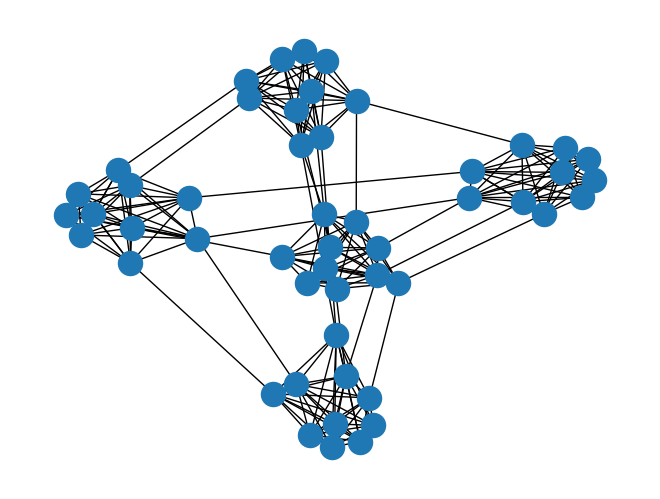

In [96]:
## Answers to Question 4
def build_graph():
    graph = nx.caveman_graph(l=5, k=10)
    starting_edges = len(graph.edges)
    while True:
        node1 = random.choice(list(graph.nodes))
        node2 = random.choice(list(graph.nodes))
        graph.add_edge(node1, node2)
        if nx.is_connected(graph) and (len(graph.edges) - starting_edges) >= 20:
            break
    return graph

graph = build_graph()
nx.draw(graph)
    

In [105]:
communities = nx.community.louvain_communities(graph)
print(communities)
print([len(c) for c in communities])

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}, {10, 11, 12, 13, 14, 15, 16, 17, 18, 19}, {20, 21, 22, 23, 24, 25, 26, 27, 28, 29}, {32, 33, 34, 35, 36, 37, 38, 39, 30, 31}, {40, 41, 42, 43, 44, 45, 46, 47, 48, 49}]
[10, 10, 10, 10, 10]


Grpah embedding is  the assigning corordinates of each nodes in a graph. Ideally closely related
nodes get similar cordinates and not connected nodes are well seperated. in addition, if possible edges do nnot cross
Different types of embedding are: spiral, planner, circular etc

In [121]:
embedding = nx.spiral_layout(graph)
print(embedding)

embedding_spectral = nx.spectral_layout(graph)
print(embedding_spectral)

embedding_circular = nx.circular_layout(graph)
print(embedding_circular)

{0: array([0.06205822, 0.00607997]), 1: array([0.08150665, 0.0131792 ]), 2: array([0.09372824, 0.03275526]), 3: array([0.09296281, 0.0599564 ]), 4: array([0.07613397, 0.08768952]), 5: array([0.04360652, 0.10794038]), 6: array([-0.00065466,  0.11330938]), 7: array([-0.04956786,  0.09850828]), 8: array([-0.09400116,  0.06156374]), 9: array([-0.12426786,  0.00451342]), 10: array([-0.13182231, -0.06654489]), 11: array([-0.11088727, -0.14209336]), 12: array([-0.05974392, -0.21045742]), 13: array([ 0.01854352, -0.25952629]), 14: array([ 0.11611899, -0.27868473]), 15: array([ 0.22108865, -0.26066596]), 16: array([ 0.31897069, -0.20303221]), 17: array([ 0.39466394, -0.1090308 ]), 18: array([0.43467089, 0.01234593]), 19: array([0.42925812, 0.14715933]), 20: array([0.3742285 , 0.27812012]), 21: array([0.2720186 , 0.38679905]), 22: array([0.13191693, 0.45617071]), 23: array([-0.03068589,  0.47314448]), 24: array([-0.19596962,  0.43071917]), 25: array([-0.34210029,  0.32943131]), 26: array([-0.448

In [122]:
import numpy as np
# def distance_between_community(community):
#     distance =[]
#     for i, each_coms in enumerate(community):
#         for each_com2 in community[i+1:]:
#             distance.append(np.sqrt(np.sum((embedding[each_coms] - embedding[each_com2])**2)))
    
#     return np.average(distance)

# within_community_distance = []
# for community  in communities:
#     within_community_distance.append(distance_between_community(list(community)))
# print(within_community_distance)
    
within_comm_distances = []
for community in communities:
    distances = []
    for node1 in community:
        for node2 in community:
            if node1 == node2: 
                continue
            distance = np.sqrt(np.sum((embedding[node1] - embedding[node2])**2))
            distances.append(distance)
    within_comm_distances.append(np.average(distances))
print(within_comm_distances)     
for i, com1 in enumerate(communities):
        for com2 in list(communities)[i+1:]:
            distance = []
            for node1 in com1:
                for node2 in com2:
                    distance.append(np.sqrt(np.sum((embedding[node1]-embedding[node2])**2)))
print(np.average(distance))
                    
            
        
            

    

[0.11485105495234976, 0.3342388925097548, 0.560833900167147, 0.78828463323368, 1.016009926644584]
1.271077483313003


In [123]:
#for spectral
within_comm_distances = []
for community in communities:
    distances = []
    for node1 in community:
        for node2 in community:
            if node1 == node2: 
                continue
            distance = np.sqrt(np.sum((embedding_spectral[node1] - embedding_spectral[node2])**2))
            distances.append(distance)
    within_comm_distances.append(np.average(distances))
print(within_comm_distances)     
for i, com1 in enumerate(communities):
        for com2 in list(communities)[i+1:]:
            distance = []
            for node1 in com1:
                for node2 in com2:
                    distance.append(np.sqrt(np.sum((embedding_spectral[node1]-embedding_spectral[node2])**2)))
print(np.average(distance))

[0.06252706068676266, 0.07975216434893385, 0.07061649316840397, 0.07276798470782994, 0.09412430487869974]
1.2447165312554374


In [124]:
# dor circular
within_comm_distances = []
for community in communities:
    distances = []
    for node1 in community:
        for node2 in community:
            if node1 == node2: 
                continue
            distance = np.sqrt(np.sum((embedding_circular[node1] - embedding_circular[node2])**2))
            distances.append(distance)
    within_comm_distances.append(np.average(distances))
print(within_comm_distances)     
for i, com1 in enumerate(communities):
        for com2 in list(communities)[i+1:]:
            distance = []
            for node1 in com1:
                for node2 in com2:
                    distance.append(np.sqrt(np.sum((embedding_circular[node1]-embedding_circular[node2])**2)))
print(np.average(distance))

[0.4518153068752753, 0.4518152922481426, 0.4518153191915333, 0.45181530682941573, 0.45181532154743265]
1.1377754012638797


# --- END OF EXAM ---
Congrats, you made it to the end of the exam! Don't forget to rename your ipynb to "GTReReExamSept_YOUR_NAME_STUDENTNR.ipynb" and hand it in via BlackBoard submit!